### Zillow Data

In [310]:
import pandas as pd
import numpy as np
import os
from plotnine import *
import scipy.stats as stats 
import warnings
warnings.filterwarnings("ignore")

In [2]:
print(os.getcwd())

/Users/rebeccawagner/Documents/Georgetown/24-25/Intro to Data Science /PPOL_5203_FinalProject/files/visualizations


In [312]:
##import housing data
housing_data = pd.read_csv("../../data/zillow/zillow_housing_neighborhood_dc.csv", encoding='utf-8')

In [314]:
housing_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/00,...,1/31/24,2/29/24,3/31/24,4/30/24,5/31/24,6/30/24,7/31/24,8/31/24,9/30/24,10/31/24
0,121697,351,Columbia Heights,neighborhood,DC,DC,Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",District of Columbia,128365.922980,...,644170.047983,644019.064424,644743.689652,645270.309480,643357.881900,638786.079529,634370.181189,630870.528000,630434.535100,630304.591840
1,121685,387,Capitol Hill,neighborhood,DC,DC,Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",District of Columbia,209056.189265,...,913032.444616,910925.961300,910974.620300,911809.044445,910670.844642,906407.478126,902717.546268,900470.681300,902069.720797,903311.527014
2,121774,740,Petworth,neighborhood,DC,DC,Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",District of Columbia,141216.817840,...,679801.120333,678476.087043,679018.369920,679949.420919,679388.155413,675121.882485,669955.606700,663863.046458,661105.866279,659101.136712
3,121668,816,Adams Morgan,neighborhood,DC,DC,Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",District of Columbia,167995.626724,...,581187.407590,581224.931615,582268.766564,583166.123988,583306.066414,581452.281209,579612.351904,578123.410176,579435.486200,581161.059991
4,403481,890,Sixteenth Street Heights,neighborhood,DC,DC,Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",District of Columbia,164864.732884,...,771301.547100,770192.858789,770981.797187,773258.812468,774139.984599,771304.847277,767026.588197,762298.012441,761328.329915,760720.622547


In [316]:
neighborhoods = [
    'Adams Morgan','Anacostia', 'Capitol Hill', 'Columbia Heights', 'Dupont', 
    'H Street', 'Navy Yard', 'NoMa', 'Petworth', 'Shaw', 'U Street'
]

query_string = ' or '.join([f'RegionName == "{neighborhood}"' for neighborhood in neighborhoods])

In [318]:
housing_data_filtered =  (
    housing_data.filter(['RegionName','State','City', '1/31/19', '2/28/19', '3/31/19', '4/30/19', '5/31/19', '6/30/19',
                        '7/31/19', '8/31/19', '9/30/19', '10/31/19', '11/30/19', '12/31/19','1/31/20', '2/29/20', '3/31/20', 
                         '4/30/20', '5/31/20', '6/30/20', '7/31/20', '8/31/20', '9/30/20', '10/31/20', '11/30/20', '12/31/20',
                         '1/31/21', '2/28/21', '3/31/21', '4/30/21', '5/31/21', '6/30/21', '7/31/21', '8/31/21', '9/30/21', 
                         '10/31/21', '11/30/21', '12/31/21', '1/31/22', '2/28/22', '3/31/22', '4/30/22', '5/31/22', '6/30/22', '7/31/22', 
                         '8/31/22', '9/30/22', '10/31/22', '11/30/22', '12/31/22', '1/31/23', 
                         '2/28/23', '3/31/23', '4/30/23', '5/31/23', '6/30/23', '7/31/23', '8/31/23', '9/30/23', '10/31/23', '11/30/23', 
                         '12/31/23', '1/31/24', '2/29/24', '3/31/24', '4/30/24', '5/31/24', '6/30/24', '7/31/24', '8/31/24', '9/30/24', 
                         '10/31/24']).melt(id_vars=['RegionName', 'State', 'City'], var_name='EndMonth', value_name='MedianHomeValue').query(query_string)
                         )

In [320]:
housing_data_filtered.shape

(560, 5)

In [322]:
housing_data_filtered_na = housing_data_filtered[~housing_data_filtered['MedianHomeValue'].isna()]
housing_data_filtered_na['EndMonth'] = pd.to_datetime(housing_data_filtered_na['EndMonth'])
housing_data_filtered_na.shape

(523, 5)

In [334]:
housing_data_filtered_na.to_csv("../../data/zillow_house_values.csv", index = False)

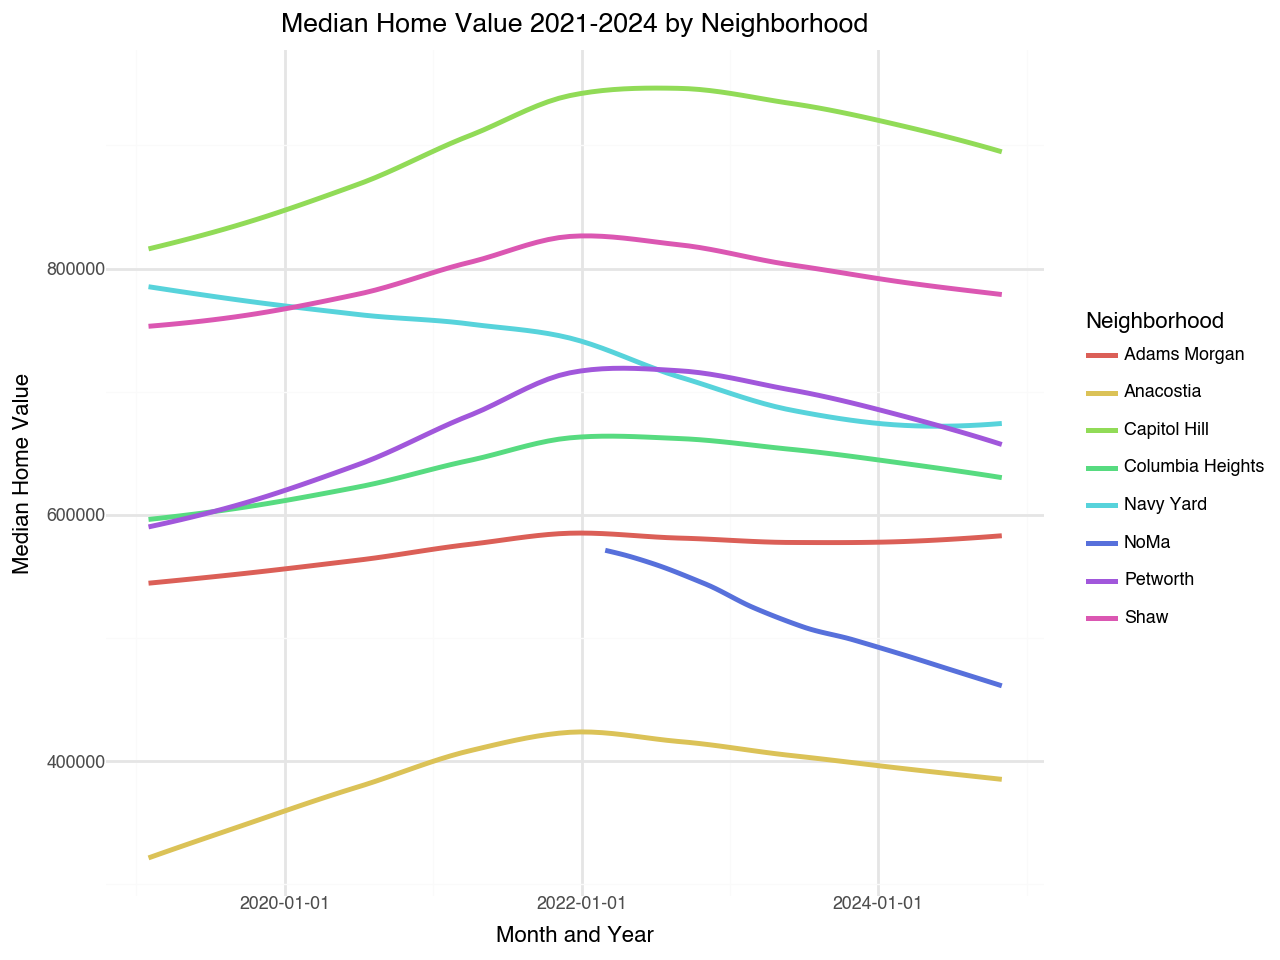

In [326]:
# step 1: data
(ggplot(data=housing_data_filtered_na) + 

# step 2: geom
 geom_smooth(

# step 3: aesthethics as variable
     aes(x="EndMonth", y="MedianHomeValue", color="RegionName"), method='loess', se=False) +

    theme_minimal(base_size=8) + 
    #theme(legend_position='none') + 


# step labels: edit the labels of the graph
labs(x="Month and Year", y="Median Home Value", title="Median Home Value 2021-2024 by Neighborhood", color="Neighborhood"))
 

In [328]:
##import rental data
rental_data = pd.read_csv("../../data/zillow/zillow_rental_value_zipcode.csv", encoding='utf-8')

In [330]:
##import zip code neighborhood
zip_code = pd.read_csv("../../data/zillow/zip_code_neighborhood.csv")
zip_code.head()

,Zip Code,Neighborhoods
0,20002,Trinidad Real Estate\nCarver Real Estate\nIvy ...
1,20011,Petworth Real Estate\nBrightwood Park Real Est...
2,20019,Benning Real Estate\nMahaning Heights Real Est...
3,20020,Skyland Real Estate\nWoodlands Real Estate\nAn...
4,20009,Adams Morgan Real Estate\nU Street Corridor Re...


In [332]:
rental_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2015-01-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,1555.281324,...,1935.568172,1957.522708,1970.900993,1994.472104,1998.255881,2012.374405,2015.978947,2025.530011,2013.823222,2004.028168
1,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,1317.214258,...,1886.237912,1900.746947,1910.295502,1920.966571,1917.565855,1917.953861,1930.319705,1940.466798,1917.997934,1901.639354
2,62080,4,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2495.949662,2451.786276,2696.150778,2627.583333
3,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,1267.825951,...,1837.851190,1844.055148,1846.257335,1870.653160,1883.202282,1891.376573,1888.020245,1886.061153,1886.948068,1899.321711
4,93144,6,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,NaN,...,1491.971429,1493.203612,1488.485006,1485.998879,1501.323433,1518.178964,1530.310869,1521.410962,1513.762609,1497.875458


In [340]:
rental_data_filter = (rental_data.filter(['RegionName','State','City','2019-01-31', '2019-02-28', '2019-03-31', 
                                          '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', 
                                          '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31', 
                                          '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30', 
                                          '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30', 
                                          '2020-12-31','2021-01-31', '2021-02-28', '2021-03-31', 
                                          '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31', 
                                          '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31', 
                                          '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31', 
                                          '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31', 
                                          '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30', 
                                          '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
                                          '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30', '2024-05-31', '2024-06-30', 
                                          '2021-07-31', '2021-08-31', '2024-09-30', '2024-10-31']).melt(id_vars=['RegionName', 'State', 'City'], var_name='EndMonth', value_name='MedianRentalPrice').query(
    'State == "DC"'))

In [342]:
rental_data_filter.head()

,RegionName,State,City,EndMonth,MedianRentalPrice
166,20002,DC,Washington,2019-01-31,2138.409625
266,20011,DC,Washington,2019-01-31,1765.709850
334,20019,DC,Washington,2019-01-31,NaN
622,20020,DC,Washington,2019-01-31,1385.645077
834,20009,DC,Washington,2019-01-31,2274.950055


In [344]:
print(cleaned_rental_data["RegionName"].dtype)

category


In [346]:
rental_data_neighborhood = pd.merge(rental_data_filter, zip_code, how = "left", left_on = "RegionName", right_on = "Zip Code")
rental_data_neighborhood.tail()

,RegionName,State,City,EndMonth,MedianRentalPrice,Zip Code,Neighborhoods
1491,20024,DC,Washington,2024-10-31,2544.548776,20024,Southwest Waterfront Real Estate\nSouthwest Fe...
1492,20037,DC,Washington,2024-10-31,2597.655882,20037,Foggy Bottom Real Estate\nWest End Real Estate...
1493,20036,DC,Washington,2024-10-31,2287.613248,20036,Dupont Circle Real Estate\nWest End Real Estat...
1494,20004,DC,Washington,2024-10-31,2633.333333,20004,Penn Quarter Real Estate\nChinatown Real Estat...
1495,20006,DC,Washington,2024-10-31,2348.555556,20006,Downtown Real Estate\nFoggy Bottom Real Estate...


In [348]:
neighborhoods = [
    'Adams Morgan','Anacostia', 'Capitol Hill', 'Columbia Heights', 'Dupont Circle', 
    'H Street', 'Navy Yard', 'NoMa', 'Petworth', 'Shaw', 'U Street'
]

keywords = '|'.join(neighborhoods)

In [352]:
rental_data_filter_zip = rental_data_neighborhood[rental_data_neighborhood['Neighborhoods'].str.contains(keywords, case=False, na=False)]
neighborhoods_filtered = rental_data_filter_zip.reset_index(drop = True)
neighborhoods_filtered.tail()

,RegionName,State,City,EndMonth,MedianRentalPrice,Zip Code,Neighborhoods
1151,20024,DC,Washington,2024-10-31,2544.548776,20024,Southwest Waterfront Real Estate\nSouthwest Fe...
1152,20037,DC,Washington,2024-10-31,2597.655882,20037,Foggy Bottom Real Estate\nWest End Real Estate...
1153,20036,DC,Washington,2024-10-31,2287.613248,20036,Dupont Circle Real Estate\nWest End Real Estat...
1154,20004,DC,Washington,2024-10-31,2633.333333,20004,Penn Quarter Real Estate\nChinatown Real Estat...
1155,20006,DC,Washington,2024-10-31,2348.555556,20006,Downtown Real Estate\nFoggy Bottom Real Estate...


In [354]:
rental_data_filter_na = neighborhoods_filtered[~neighborhoods_filtered['MedianRentalPrice'].isna()]
rental_data_filter_na['EndMonth'] = pd.to_datetime(neighborhoods_filtered['EndMonth'])
rental_data_filter_na['RegionName'] = rental_data_filter_na['RegionName'].astype('category')
cleaned_rental_data = rental_data_filter_na.reset_index(drop = True)
cleaned_rental_data.head()

,RegionName,State,City,EndMonth,MedianRentalPrice,Zip Code,Neighborhoods
0,20002,DC,Washington,2019-01-31,2138.409625,20002,Trinidad Real Estate\nCarver Real Estate\nIvy ...
1,20011,DC,Washington,2019-01-31,1765.709850,20011,Petworth Real Estate\nBrightwood Park Real Est...
2,20020,DC,Washington,2019-01-31,1385.645077,20020,Skyland Real Estate\nWoodlands Real Estate\nAn...
3,20009,DC,Washington,2019-01-31,2274.950055,20009,Adams Morgan Real Estate\nU Street Corridor Re...
4,20001,DC,Washington,2019-01-31,2368.450663,20001,Truxton Circle Real Estate\nShaw Real Estate\n...


In [356]:
print(cleaned_rental_data["RegionName"].dtype)

category


In [358]:
cleaned_rental_data['Neighborhoods'] = [x.replace('Real Estate', '') for x in cleaned_rental_data['Neighborhoods']]
cleaned_rental_data['Neighborhoods'] = [x.strip() for x in cleaned_rental_data['Neighborhoods']]
cleaned_rental_data.head()

,RegionName,State,City,EndMonth,MedianRentalPrice,Zip Code,Neighborhoods
0,20002,DC,Washington,2019-01-31,2138.409625,20002,Trinidad \nCarver \nIvy City \nNear Northeast ...
1,20011,DC,Washington,2019-01-31,1765.709850,20011,Petworth \nBrightwood Park \nSixteenth Street ...
2,20020,DC,Washington,2019-01-31,1385.645077,20020,Skyland \nWoodlands \nAnacostia \nKnox Hill \n...
3,20009,DC,Washington,2019-01-31,2274.950055,20009,Adams Morgan \nU Street Corridor \nDupont Circ...
4,20001,DC,Washington,2019-01-31,2368.450663,20001,Truxton Circle \nShaw \nLedroit Park \nMount V...


In [360]:
cleaned_rental_data['Neighborhoods'] = [x.split(' \n') for x in cleaned_rental_data['Neighborhoods']]
cleaned_rental_data.head()

,RegionName,State,City,EndMonth,MedianRentalPrice,Zip Code,Neighborhoods
0,20002,DC,Washington,2019-01-31,2138.409625,20002,"[Trinidad, Carver, Ivy City, Near Northeast, G..."
1,20011,DC,Washington,2019-01-31,1765.709850,20011,"[Petworth, Brightwood Park, Sixteenth Street H..."
2,20020,DC,Washington,2019-01-31,1385.645077,20020,"[Skyland, Woodlands, Anacostia, Knox Hill, Ran..."
3,20009,DC,Washington,2019-01-31,2274.950055,20009,"[Adams Morgan, U Street Corridor, Dupont Circl..."
4,20001,DC,Washington,2019-01-31,2368.450663,20001,"[Truxton Circle, Shaw, Ledroit Park, Mount Ver..."


In [362]:
cleaned_rental_data['Neighborhoods'] = cleaned_rental_data['Neighborhoods'].apply(lambda x: [item for item in x if item in neighborhoods])
cleaned_rental_data.head()

,RegionName,State,City,EndMonth,MedianRentalPrice,Zip Code,Neighborhoods
0,20002,DC,Washington,2019-01-31,2138.409625,20002,"[NoMa, Capitol Hill]"
1,20011,DC,Washington,2019-01-31,1765.709850,20011,"[Petworth, Columbia Heights]"
2,20020,DC,Washington,2019-01-31,1385.645077,20020,[Anacostia]
3,20009,DC,Washington,2019-01-31,2274.950055,20009,"[Adams Morgan, Dupont Circle, Columbia Heights..."
4,20001,DC,Washington,2019-01-31,2368.450663,20001,"[Shaw, NoMa]"


In [366]:
rental_data_clean = cleaned_rental_data.explode("Neighborhoods")
rental_data_clean.head()

,RegionName,State,City,EndMonth,MedianRentalPrice,Zip Code,Neighborhoods
0,20002,DC,Washington,2019-01-31,2138.409625,20002,NoMa
0,20002,DC,Washington,2019-01-31,2138.409625,20002,Capitol Hill
1,20011,DC,Washington,2019-01-31,1765.709850,20011,Petworth
1,20011,DC,Washington,2019-01-31,1765.709850,20011,Columbia Heights
2,20020,DC,Washington,2019-01-31,1385.645077,20020,Anacostia


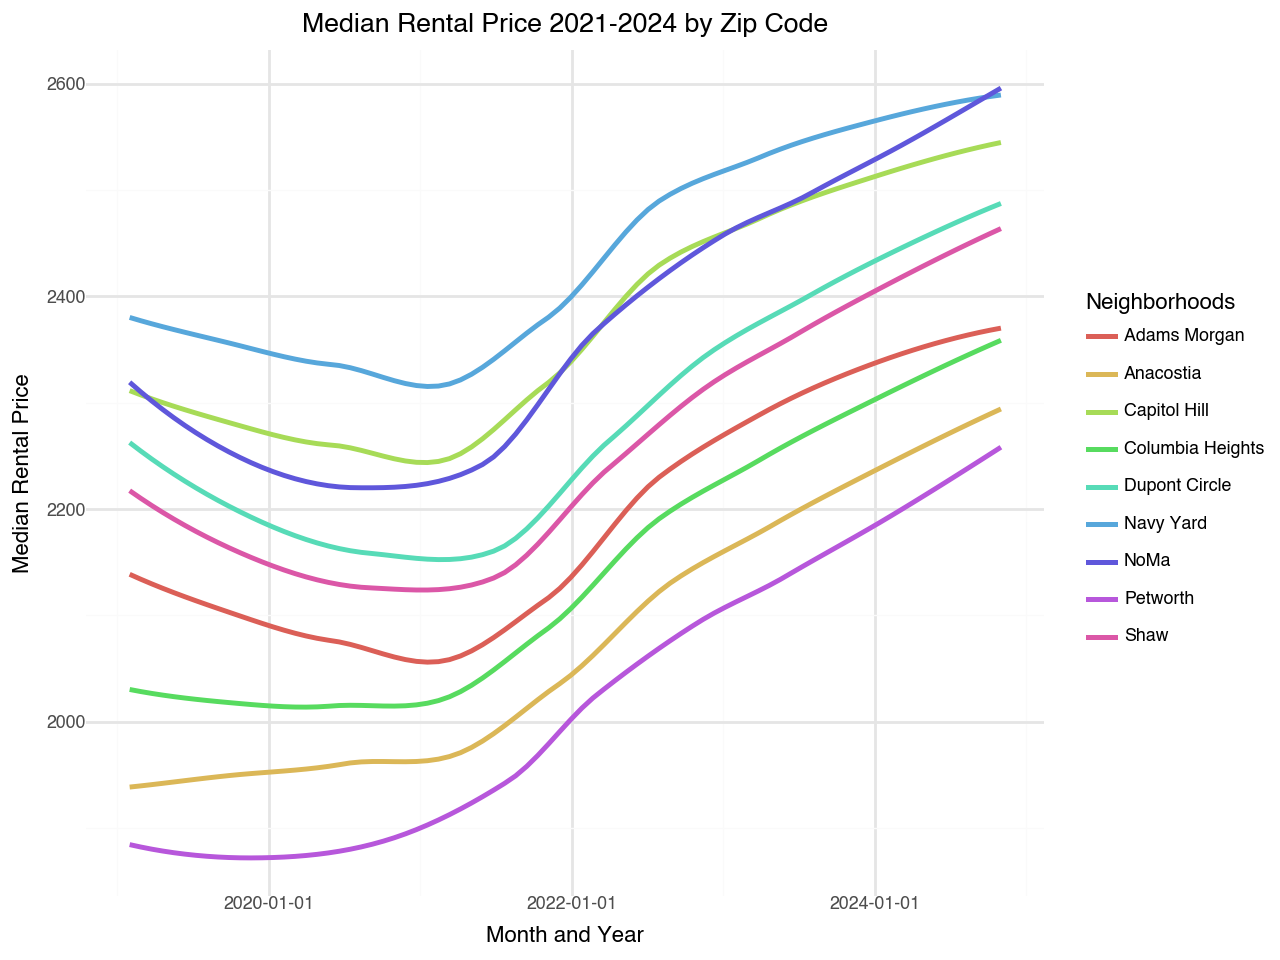

In [368]:
# step 1: data
(ggplot(data=rental_data_clean) + 

# step 2: geom
 geom_smooth(

# step 3: aesthethics as variable
     aes(x="EndMonth", y="MedianRentalPrice", color="Neighborhoods"), method='loess', se=False, size = 1) +

    theme_minimal(base_size=8) + 
    #theme(legend_position='none') + 


# step labels: edit the labels of the graph
labs(x="Month and Year", y="Median Rental Price", title="Median Rental Price 2021-2024 by Zip Code", color="Neighborhoods"))

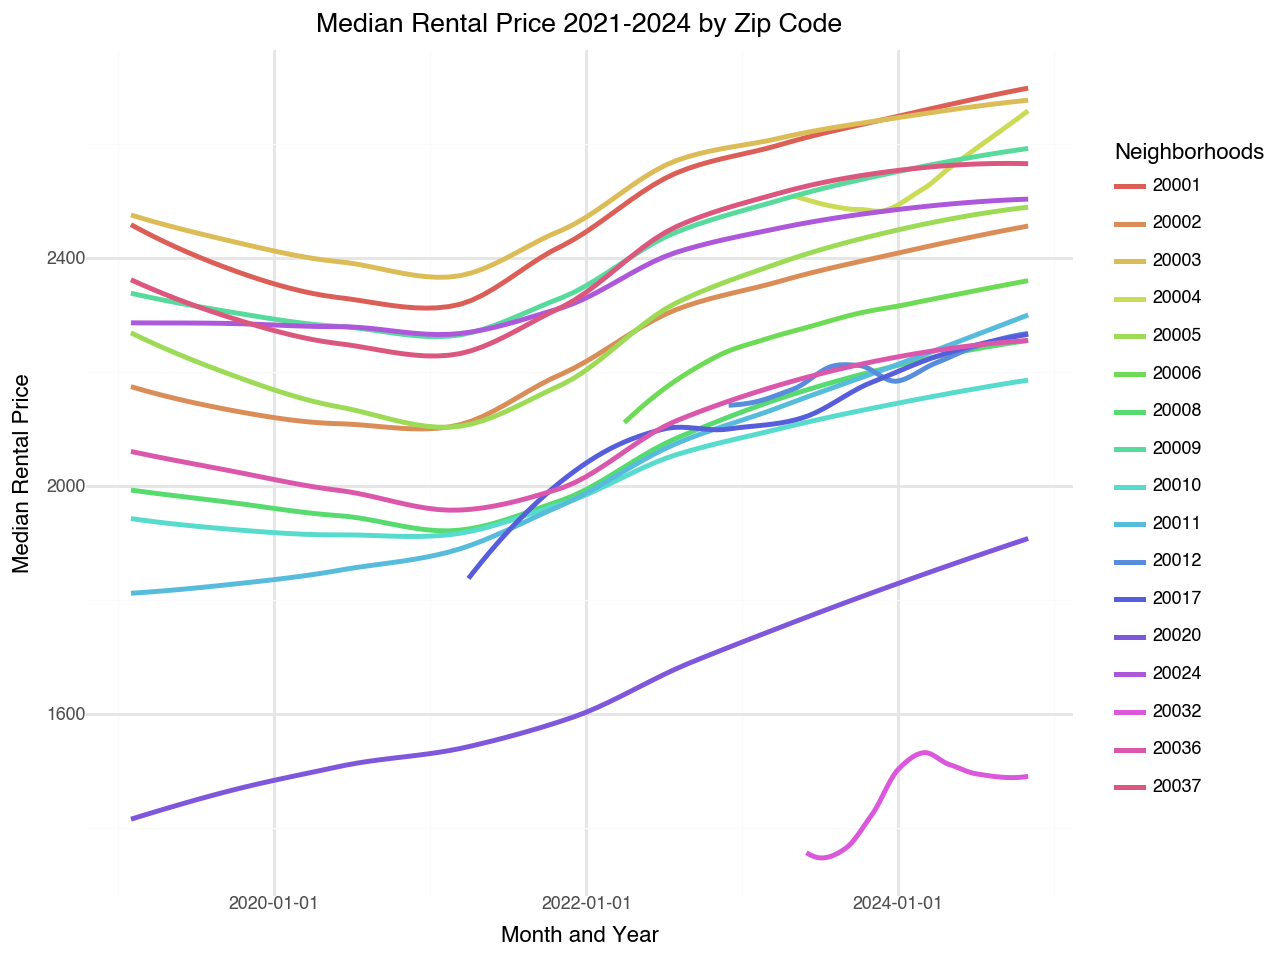

In [370]:
# step 1: data
(ggplot(data=rental_data_clean) + 

# step 2: geom
 geom_smooth(

# step 3: aesthethics as variable
     aes(x="EndMonth", y="MedianRentalPrice", color="RegionName"), method='loess', se=False, size = 1) +

    theme_minimal(base_size=8) + 
    #theme(legend_position='none') + 


# step labels: edit the labels of the graph
labs(x="Month and Year", y="Median Rental Price", title="Median Rental Price 2021-2024 by Zip Code", color="Neighborhoods"))